In [2]:
# Data Handling
import pandas as pd, numpy as np

# Plotting
import matplotlib.pyplot as plt, seaborn as sns

# Data Scaling
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

# Metrics
from sklearn.metrics import balanced_accuracy_score, f1_score, ConfusionMatrixDisplay

# 2D Plotting
import umap

# Tomeks Links
from imblearn.under_sampling import TomekLinks

# Model Stuffs
import time
from sklearn.model_selection import train_test_split
# from sklearn.utils import class_weight

# Algorithms Used
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier

# Hyperparams
import optuna

# Feature Importances
import shap

# General Management
import gc as gc
gc.enable()
from joblib import dump, load
from warnings import filterwarnings

# Notebook configurations
filterwarnings('ignore')
shap.initjs()

c:\Users\ar_t_e_m_is\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Read in training data
train = pd.read_csv('C:\\Users\\ar_t_e_m_is\\Desktop\\train.csv')

In [4]:
# Drop unnecessary columns
train.drop(['id', 'Unnamed: 0'], inplace=True, axis=1)

In [5]:
train.head(n=10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [6]:
# Evaluate % of each class
train['satisfaction'].value_counts(normalize=True)

neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: satisfaction, dtype: float64

In [7]:
# Convert class to 1 or 0
train['satisfaction'] = [1 if x=='satisfied' else 0 for x in train['satisfaction']]

In [8]:
# After manual review, determine the appropriate datatypes for each feature
types_dict = {'Gender': 'object', 'Customer Type': 'object', 'Age': 'int64', 'Type of Travel': 'object', 'Class': 'object', 'Flight Distance': 'int64',
              'Inflight wifi service': 'object', 'Departure/Arrival time convenient': 'object', 'Ease of Online booking': 'object', 'Gate location': 'object',
              'Food and drink': 'object', 'Online boarding': 'object', 'Seat comfort': 'object', 'Inflight entertainment': 'object', 'On-board service': 'object',
              'Seat comfort': 'object', 'Inflight entertainment': 'object', 'On-board service': 'object', 'Leg room service': 'object', 'Baggage handling': 'object',
              'Checkin service': 'object', 'Inflight service': 'object', 'Cleanliness': 'object', 'Departure Delay in Minutes': 'float64', 'Arrival Delay in Minutes': 'float64',
              'satisfaction': 'bool'}        

In [9]:
# Set dtypes
train = train.astype(types_dict)

# EDA

In [10]:
# Set plot configs
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

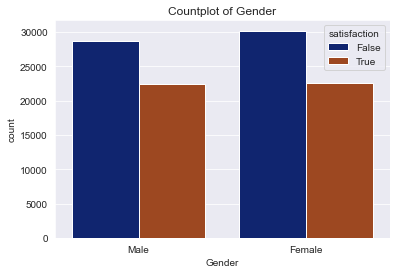

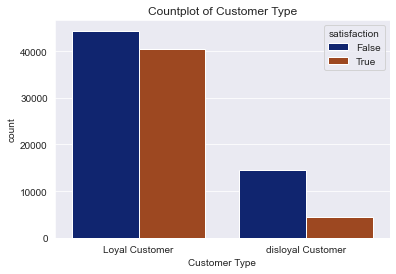

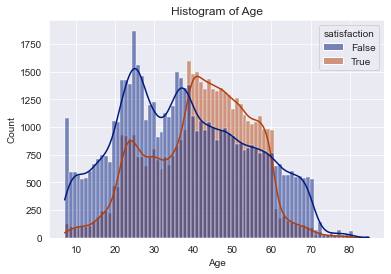

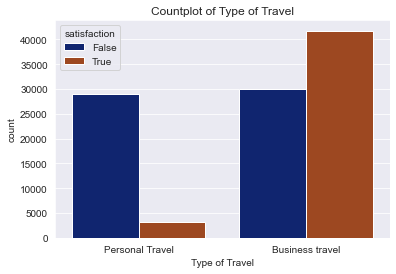

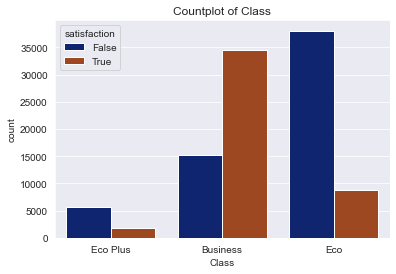

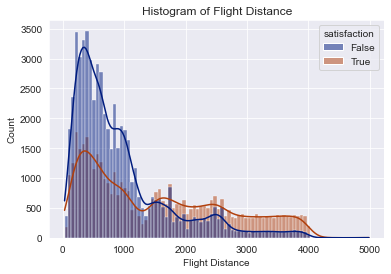

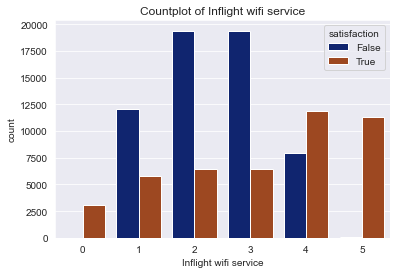

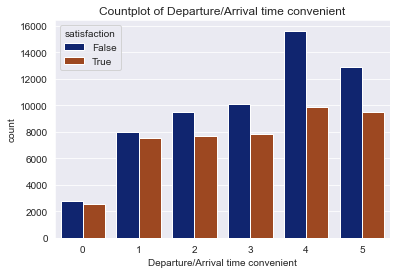

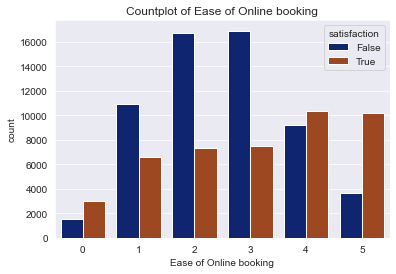

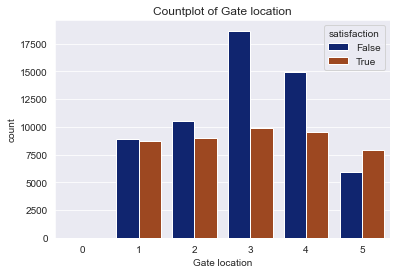

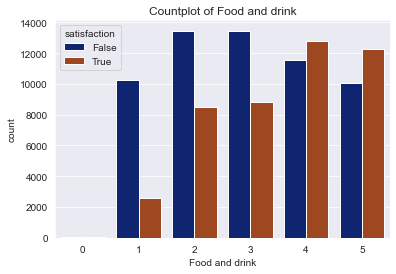

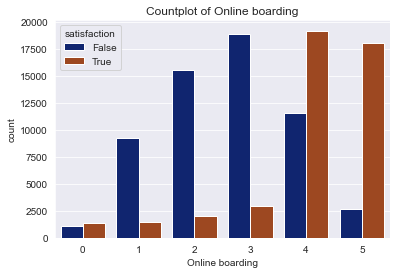

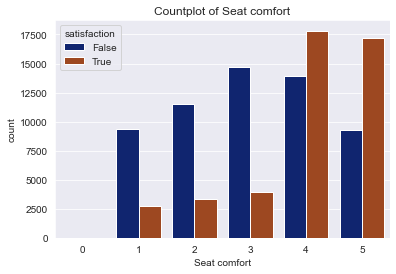

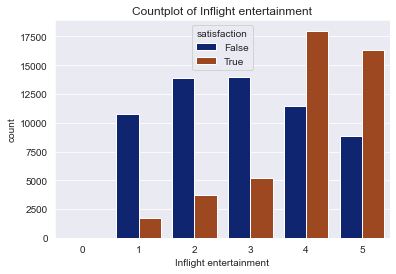

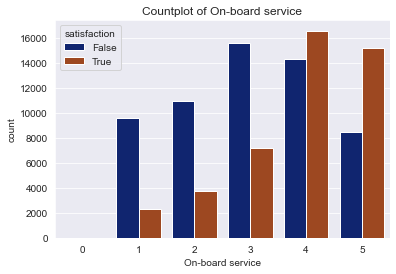

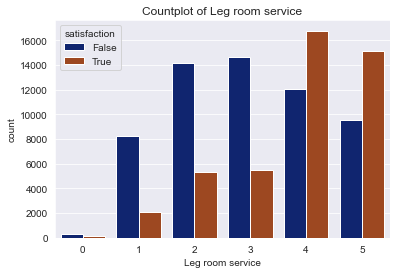

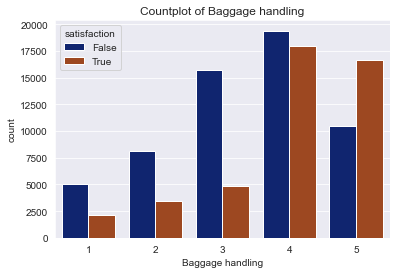

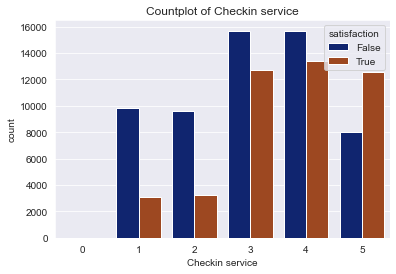

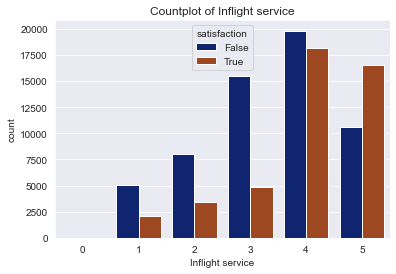

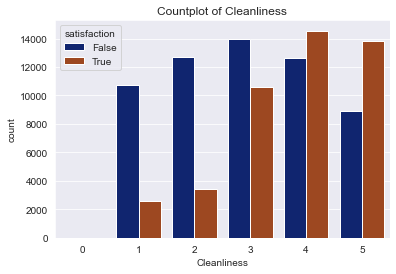

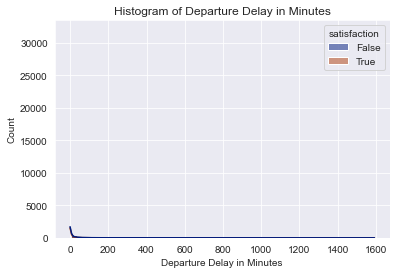

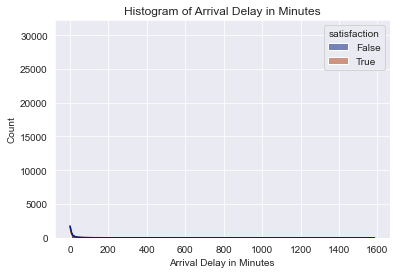

In [11]:
# Skipping the target, create plots for each column to see the distributions by class

for col in [x for x in train.columns if x != 'satisfaction']:
    if train[col].dtype in ['int64', 'float64']:
        sns.histplot(data=train, x=col, hue='satisfaction', kde=True, palette="dark").set(title="Histogram of {}".format(str(col)))
        plt.show()
    else:
        sns.countplot(x=col, data=train, hue='satisfaction', palette="dark").set(title="Countplot of {}".format(str(col)))
        plt.show()

In [12]:
# Create printouts of each feature by class
for col in train.columns:
    print("====== {} ======".format(col))
    if train[col].dtype == 'object':
        print(train.pivot_table(index=['satisfaction'], columns=col, aggfunc='size', fill_value=0))
        print()    
    else:
        print(train[col].describe().T)
        print()

====== Gender ======
Gender        Female   Male
satisfaction               
False          30193  28686
True           22534  22491

====== Customer Type ======
Customer Type  Loyal Customer  disloyal Customer
satisfaction                                    
False                   44390              14489
True                    40533               4492

====== Age ======
count    103904.000000
mean         39.379706
std          15.114964
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

====== Type of Travel ======
Type of Travel  Business travel  Personal Travel
satisfaction                                    
False                     29909            28970
True                      41746             3279

====== Class ======
Class         Business    Eco  Eco Plus
satisfaction                           
False            15185  38044      5650
True             34480   8701      1844

=====

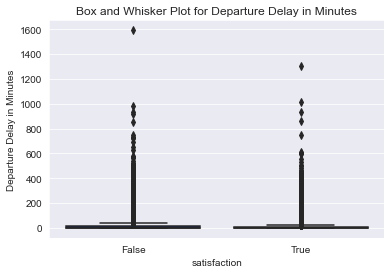

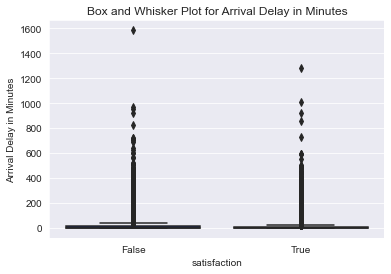

In [13]:
# Specifically look at Arrival/Departure delay since there seems to be outliers
for col in train.columns:
    if 'Delay' in str(col):
        sns.boxplot(data=train, x='satisfaction', y=col, palette="dark").set(title="Box and Whisker Plot for {}".format(str(col)))
        plt.show()

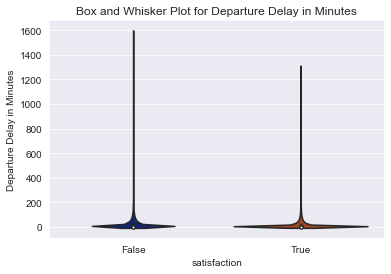

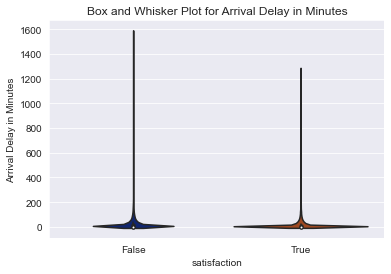

In [14]:
# Same thing, but using violinplots
for col in train.columns:
    if 'Delay' in str(col):
        sns.violinplot(data=train, x='satisfaction', y=col, palette="dark").set(title="Box and Whisker Plot for {}".format(str(col)))
        plt.show()

# Data Prep

In [15]:
# Evaluate which fields have missing values
percent_missing = train.isnull().sum() * 100 / train.shape[0]
missing_value_df = pd.DataFrame({'column_name': train.columns,
                                 'percent_missing': percent_missing})

missing_value_df                                 

,column_name,percent_missing
Gender,Gender,0.000000
Customer Type,Customer Type,0.000000
Age,Age,0.000000
Type of Travel,Type of Travel,0.000000
Class,Class,0.000000
Flight Distance,Flight Distance,0.000000
Inflight wifi service,Inflight wifi service,0.000000
Departure/Arrival time convenient,Departure/Arrival time convenient,0.000000
Ease of Online booking,Ease of Online booking,0.000000
Gate location,Gate location,0.000000


In [16]:
# Handle and process the data
numerical_columns = [x for x in train.columns if train[x].dtype != 'object' and x != 'satisfaction']
cat_columns = [x for x in train.columns if x not in numerical_columns and x != 'satisfaction']

# We are making the assumption that missing data means they did not have a delay
train['Arrival Delay in Minutes'].fillna(0, inplace=True)

In [17]:
# Use a robust outlier to handle the delay features
rs = RobustScaler(quantile_range=(20,80))

train['Arrival Delay in Minutes'] = rs.fit_transform(train['Arrival Delay in Minutes'].to_numpy().reshape(-1,1))
train['Departure Delay in Minutes'] = rs.fit_transform(train['Departure Delay in Minutes'].to_numpy().reshape(-1,1))

In [18]:
# One hot encoe the categorical data
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False, drop='first')
encoded_data = pd.DataFrame(data=ohe.fit_transform(train[cat_columns]), columns=ohe.get_feature_names_out())

In [19]:
# Create a dataframe of the data prepped for modeling
modeling_data = pd.concat([train[numerical_columns], encoded_data], axis=1)

In [20]:
# Determine the categorical columns for the modeling dataframe
modeling_cat_cols = [col for col in modeling_data.columns if col not in ['Age', 'Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes', 'satisfaction']]

In [21]:
# Change types to category
for col in modeling_cat_cols:
    modeling_data[col] = modeling_data[col].astype('category')

In [22]:
# Long run time
# umapper = umap.UMAP(n_neighbors=100, n_components=2, n_jobs=2)
# umap_data = umapper.fit_transform(modeling_data)

In [23]:
# sns.scatterplot(x=umap_data[:,0], y=umap_data[:, 1], hue=train['satisfaction'], palette="dark").set(title="UMAP Data")

In [24]:
# For any of the encoded data, ensure it is boolean
for col in modeling_data.columns:
    if '_' in str(col):
        modeling_data[col] = modeling_data[col].astype('bool')

In [25]:
# Create a TomekLinks object to remove Tomek Links
# https://imbalanced-learn.org/stable/under_sampling.html#tomek-links
tl = TomekLinks(sampling_strategy="all", n_jobs=3)

In [26]:
# Remove Tomek Links
X, y = tl.fit_resample(modeling_data, train['satisfaction'])
new_modeling_data = pd.DataFrame(data=X, columns=modeling_data.columns)

In [27]:
# Evaluate size of data after Tomek Link removal
print(modeling_data.shape[0])
print(new_modeling_data.shape[0])

103904
92144


# Modeling

In [28]:
# Create list of classifiers to test

"""
In this example, we opted for mostly tree-based and straight forward linear algorithms
This was mostly due to 2 things:
1. A mix of categorical and numerical values with some degree of outliers, so looking for techniques that could handle both categorical and numerical data
without being overly sensitive to outliers
2. Speed. We did have to work through this rather quickly, so we needed algorithms we knew could run quickly-ish.
"""

classifiers = [XGBClassifier(n_jobs=4, random_state=100, categorical_feature=True), 
               LGBMClassifier(is_unbalance=True, n_jobs=4, random_state=100), 
               RandomForestClassifier(random_state=100), ExtraTreesClassifier(random_state=100),
               GradientBoostingClassifier(random_state=100), DecisionTreeClassifier(random_state=100), ExtraTreeClassifier(random_state=100),
               LogisticRegression(random_state=100), RidgeClassifier(random_state=100)]

In [29]:
# Function to test multiple classifiers
def test_classifiers(train_data, train_classes, test_data, test_classes, classifiers):
    
    res = {}

    for clf in classifiers:
        name = clf.__class__.__name__

        print("Now training {}...".format(name))

        start_time = time.time()
        clf.fit(train_data, train_classes)
        
        acc = round(balanced_accuracy_score(test_classes, clf.predict(test_data)), 3)
        f1 = round(f1_score(y_true=test_classes, y_pred = clf.predict(test_data), average='weighted'), 3)

        stop_time = time.time()

        time_to_run = round(stop_time - start_time,3)

        print("{} trained in {} with an F1 of : {} and an accuracy of: {}".format(name, time_to_run, f1, acc))

        res[name] = (acc, f1, time_to_run)

    return res


In [30]:
X_train, X_test, y_train, y_test = train_test_split(new_modeling_data, y, stratify=y, test_size=0.2, random_state=100)

In [31]:
classifier_results = test_classifiers(X_train, y_train, X_test, y_test, classifiers)

Now training XGBClassifier...
[22:16:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "categorical_feature" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


XGBClassifier trained in 6.165 with an F1 of : 0.972 and an accuracy of: 0.97
Now training LGBMClassifier...
LGBMClassifier trained in 1.043 with an F1 of : 0.972 and an accuracy of: 0.97
Now training RandomForestClassifier...
RandomForestClassifier trained in 8.563 with an F1 of : 0.967 and an accuracy of: 0.964
Now training ExtraTreesClassifier...
ExtraTreesClassifier trained in 11.606 with an F1 of : 0.966 and an accuracy of: 0.963
Now training GradientBoostingClassifier...
GradientBoostingClassifier trained in 16.241 with an F1 of :

In [32]:
# Save off data for reading in by Optuna later
dump(value=[X_train, X_test, y_train, y_test], filename='data.joblib', compress=5)

['data.joblib']

# Model Optimization

In [33]:
# Quick function for reading in the data from serialized form
def get_data():
    data = load('data.joblib')
    return data

In [34]:
# Using Optuna to optimally select algorithm + parameters
def optimize_objective(trial):
    
    # Read in the data that each experiment will need
    data = get_data()
    X_train = data[0]
    X_test = data[1]
    y_train = data[2]
    y_test = data[3]

    # Use Optuna to find the best algorithm to use
    algorithm = trial.suggest_categorical('algorithm', ['XGB', 'LGBM'])

    # If it wants to use XGBoost, optimize the following parameters
    if algorithm == 'XGB':
        xgb_booster = trial.suggest_categorical('xgb_booster', ['gbtree', 'dart'])
        xgb_eta = trial.suggest_float('xgb_eta', 0.1, 0.99)
        xgb_max_depth = trial.suggest_int('xgb_max_depth', 1, 1000)

        model = XGBClassifier(booster=xgb_booster, eta=xgb_eta, max_depth=xgb_max_depth, n_jobs=4, random_state=8)

    # Otherwise, it wants LGBM, so optimize these parameters
    else:
        lgbm_boosting = trial.suggest_categorical('lgbm_boosting', ['gbdt', 'rf', 'dart', 'goss'])
        lgbm_num_iterations = trial.suggest_int('lgbm_num_ierations', 10, 1000)
        lgbm_learning_rate = trial.suggest_float('lgbm_learning_rate', 0.05, 0.99)

        model = LGBMClassifier(boosting_type=lgbm_boosting, num_iterations=lgbm_num_iterations, learning_rate=lgbm_learning_rate, n_jobs=4, random_state=8)

    # Fit and score the model
    model.fit(X_train, y_train)
    score = f1_score(y_true = y_test, y_pred = model.predict(X_test), average='weighted')

    # Return the model
    return score

In [36]:
# We want to maximize the score, i.e., the F-1
study = optuna.create_study(direction="maximize")
# Run Optuna a maximum of 10 times to find the best set of params for the best algo
study.optimize(optimize_objective, n_trials=10)

[I 2022-07-24 22:18:38,136] A new study created in memory with name: no-name-cad2c182-0546-41f2-8ee9-eb392e1c2c21
[I 2022-07-24 22:18:39,910] Trial 0 finished with value: 0.9688139543869185 and parameters: {'algorithm': 'LGBM', 'lgbm_boosting': 'goss', 'lgbm_num_ierations': 400, 'lgbm_learning_rate': 0.7105325655415533}. Best is trial 0 with value: 0.9688139543869185.
[I 2022-07-24 22:18:40,640] Trial 1 finished with value: 0.9694630937599399 and parameters: {'algorithm': 'LGBM', 'lgbm_boosting': 'gbdt', 'lgbm_num_ierations': 48, 'lgbm_learning_rate': 0.5763967394353525}. Best is trial 1 with value: 0.9694630937599399.
[I 2022-07-24 22:19:33,820] Trial 2 finished with value: 0.9714711326806759 and parameters: {'algorithm': 'XGB', 'xgb_booster': 'dart', 'xgb_eta': 0.713656205638161, 'xgb_max_depth': 445}. Best is trial 2 with value: 0.9714711326806759.
[I 2022-07-24 22:19:36,196] Trial 3 finished with value: 0.8561199719679159 and parameters: {'algorithm': 'LGBM', 'lgbm_boosting': 'gbdt

In [37]:
# Quick function to get and sort the Optuna trials for the top-n
def get_optuna_trials(study, top_n):
    all_trials = study.get_trials()
    res_trials = {}
    for _t in all_trials:
        res_trials[_t.number] = (_t.value, _t.params)

    f_trials = sorted(res_trials.items(), key=lambda x: x[1][0], reverse=True)[:top_n]

    return f_trials

In [38]:
# Get the best trial
f_trials = get_optuna_trials(study, 1)
f_trials

[(9,
  (0.9748838510882963,
   {'algorithm': 'LGBM',
    'lgbm_boosting': 'dart',
    'lgbm_num_ierations': 406,
    'lgbm_learning_rate': 0.23524669894791778}))]

In [39]:
# Using optimal parameters, train a final model
final_model = LGBMClassifier(boosting_type='dart', num_iterations=406, learning_rate=0.235)
final_model.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', learning_rate=0.235, num_iterations=406)

In [40]:
# Print metrics
print(balanced_accuracy_score(y_test, final_model.predict(X_test)))
print(f1_score(y_test, final_model.predict(X_test)))

0.9723649915529345
0.9697283311772316


# Test

In [41]:
# Read in testing data
test = pd.read_csv('C:\\Users\\ar_t_e_m_is\\Desktop\\test.csv')
# Set types
test = test.astype({k:v for k,v in types_dict.items() if k != 'satisfaction'})

In [42]:
# Format the testing data like we did for training
testing_labels = [1 if x=='satisfied' else 0 for x in test['satisfaction']]
test.drop(['Unnamed: 0', 'id', 'satisfaction'], inplace=True, axis=1)

In [43]:
# Use the SAME OHE object from earlier, and .transform, NOT .FIT_TRANSFORM!!
testing_encoded_data = pd.DataFrame(data=ohe.transform(test[cat_columns]), columns=ohe.get_feature_names_out())

# Create a dataframe of the data prepped for modeling
test_modeling_data = pd.concat([test[numerical_columns], testing_encoded_data], axis=1)

# Change types to category
for col in modeling_cat_cols:
    test_modeling_data[col] = test_modeling_data[col].astype('category')

    # For any of the encoded data, ensure it is boolean
for col in test_modeling_data.columns:
    if '_' in str(col):
        test_modeling_data[col] = test_modeling_data[col].astype('bool')

In [44]:
# Print metrics
print(balanced_accuracy_score(testing_labels, final_model.predict(test_modeling_data)))
print(f1_score(testing_labels, final_model.predict(test_modeling_data)))

0.9602221215939235
0.9565217391304348


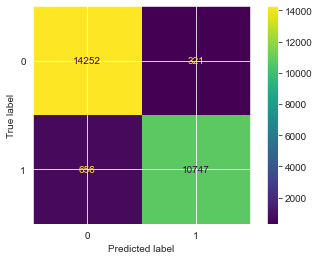

In [45]:
# Plot Confusion Matrix
ConfusionMatrixDisplay.from_estimator(final_model, test_modeling_data, testing_labels)

In [46]:
# Run SHAP Calculations
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(test_modeling_data)

In [47]:
# NumPy magic to convert shap vals to usable format
abs_mean_shap = np.mean(np.array([np.absolute(np.array(shap_values[0])), np.absolute(np.array(shap_values[1]))]), axis=0)

In [48]:
# Get a dataframe of the shap values for each feature, for each sample
# Then, create an average per feature
shap_df = pd.DataFrame(data=abs_mean_shap, columns=X_test.columns)
shap_avg_df = pd.DataFrame(shap_df.mean().to_dict(),index=[shap_df.index.values[-1]])

In [49]:
# Reformat the dataframe
shap_plot_df = shap_avg_df.T.reset_index()
shap_plot_df.columns = ['Feature', 'Mean ABS SHAP']

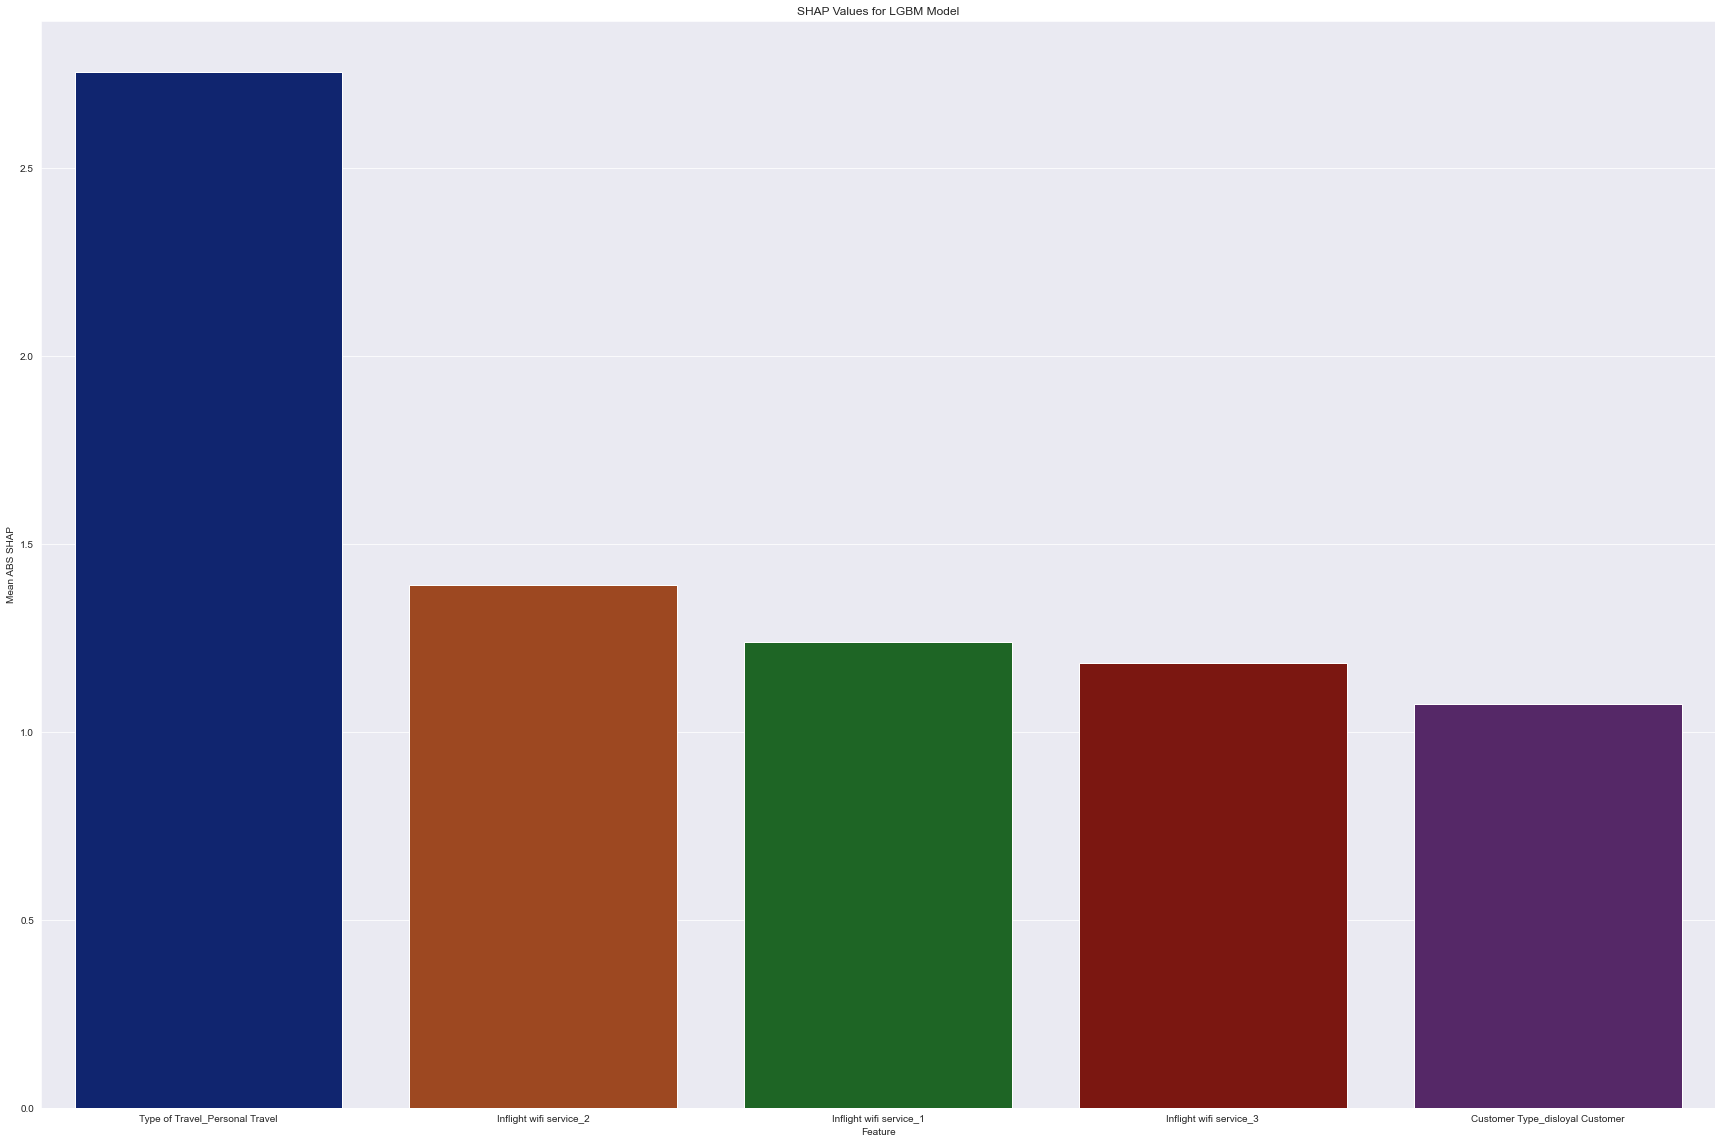

In [50]:
# Create a top 5 plot
plt.figure(figsize=(30, 20))
sns.barplot(data=shap_plot_df.sort_values(by='Mean ABS SHAP', ascending=False).head(n=5), x='Feature', y='Mean ABS SHAP', palette="dark").set(title="SHAP Values for LGBM Model")
plt.show()